<a href="https://colab.research.google.com/github/Niroth36/Machine_Learning_First_Assignment/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [8]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load dataset
from sklearn.datasets import load_diabetes
data = load_diabetes()

# Create a DataFrame for analysis
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # Disease progression measure

# Dimensions of the dataset
print(f"Shape of data (samples, features): {df.shape}")
print(f"Number of samples (patients): {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"Target variable: Disease progression (continuous value)")
print(f"\nFeature names:")
for i, feature in enumerate(data.feature_names):
    print(f"  {i+1:2d}. {feature}")

Shape of data (samples, features): (442, 11)
Number of samples (patients): 442
Number of features: 11
Target variable: Disease progression (continuous value)

Feature names:
   1. age
   2. sex
   3. bmi
   4. bp
   5. s1
   6. s2
   7. s3
   8. s4
   9. s5
  10. s6


## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

Task: Regression problem to predict disease progression in diabetes patients.

Goal: Build a model that can predict disease progression based on patient measurements.

What I want to achieve:

*   Predict a quantitative measure of diabetes
progression one year after baseline.
*   Identify which features most influence disease progression

*   Create a model that could help in clinical assessment and treatment planning






## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

A peek at the data

In [9]:
print("First 10 rows of data:")
print(df.head(10))
print("\nData types:")
print(df.dtypes)
print()

First 10 rows of data:
     age    sex    bmi     bp     s1     s2         s3     s4     s5     s6  \
0  0.038  0.051  0.062  0.022 -0.044 -0.035 -4.340e-02 -0.003  0.020 -0.018   
1 -0.002 -0.045 -0.051 -0.026 -0.008 -0.019  7.441e-02 -0.039 -0.068 -0.092   
2  0.085  0.051  0.044 -0.006 -0.046 -0.034 -3.236e-02 -0.003  0.003 -0.026   
3 -0.089 -0.045 -0.012 -0.037  0.012  0.025 -3.604e-02  0.034  0.023 -0.009   
4  0.005 -0.045 -0.036  0.022  0.004  0.016  8.142e-03 -0.003 -0.032 -0.047   
5 -0.093 -0.045 -0.041 -0.019 -0.069 -0.079  4.128e-02 -0.076 -0.041 -0.096   
6 -0.045  0.051 -0.047 -0.016 -0.040 -0.025  7.788e-04 -0.039 -0.063 -0.038   
7  0.064  0.051 -0.002  0.067  0.091  0.109  2.287e-02  0.018 -0.036  0.003   
8  0.042  0.051  0.062 -0.040 -0.014  0.006 -2.867e-02 -0.003 -0.015  0.011   
9 -0.071 -0.045  0.039 -0.033 -0.013 -0.035 -2.499e-02 -0.003  0.068 -0.014   

   target  
0   151.0  
1    75.0  
2   141.0  
3   206.0  
4   135.0  
5    97.0  
6   138.0  
7    63.0  

Statistical summary of all attributes

In [10]:
pd.set_option('display.precision', 3)
print(df.describe())
print()

             age        sex        bmi         bp         s1         s2  \
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02  4.420e+02   
mean  -2.512e-19  1.231e-17 -2.246e-16 -4.798e-17 -1.381e-17  3.918e-17   
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02  4.762e-02   
min   -1.072e-01 -4.464e-02 -9.028e-02 -1.124e-01 -1.268e-01 -1.156e-01   
25%   -3.730e-02 -4.464e-02 -3.423e-02 -3.666e-02 -3.425e-02 -3.036e-02   
50%    5.383e-03 -4.464e-02 -7.284e-03 -5.670e-03 -4.321e-03 -3.819e-03   
75%    3.808e-02  5.068e-02  3.125e-02  3.564e-02  2.836e-02  2.984e-02   
max    1.107e-01  5.068e-02  1.706e-01  1.320e-01  1.539e-01  1.988e-01   

              s3         s4         s5         s6   target  
count  4.420e+02  4.420e+02  4.420e+02  4.420e+02  442.000  
mean  -5.777e-18 -9.043e-18  9.294e-17  1.130e-17  152.133  
std    4.762e-02  4.762e-02  4.762e-02  4.762e-02   77.093  
min   -1.023e-01 -7.639e-02 -1.261e-01 -1.378e-01   25.000  
25%   -3.512e-02 -3

Target Distribution (class distribution for regression)

In [11]:
print(f"Target variable range: {df['target'].min():.1f} to {df['target'].max():.1f}")
print(f"Mean progression: {df['target'].mean():.1f}")
print(f"Median progression: {df['target'].median():.1f}")
print(f"Standard deviation: {df['target'].std():.1f}")
print()

# Show distribution statistics
print("Target value distribution:")
print(df['target'].describe())
print()

Target variable range: 25.0 to 346.0
Mean progression: 152.1
Median progression: 140.5
Standard deviation: 77.1

Target value distribution:
count    442.000
mean     152.133
std       77.093
min       25.000
25%       87.000
50%      140.500
75%      211.500
max      346.000
Name: target, dtype: float64



### Univariate plots

Histogram

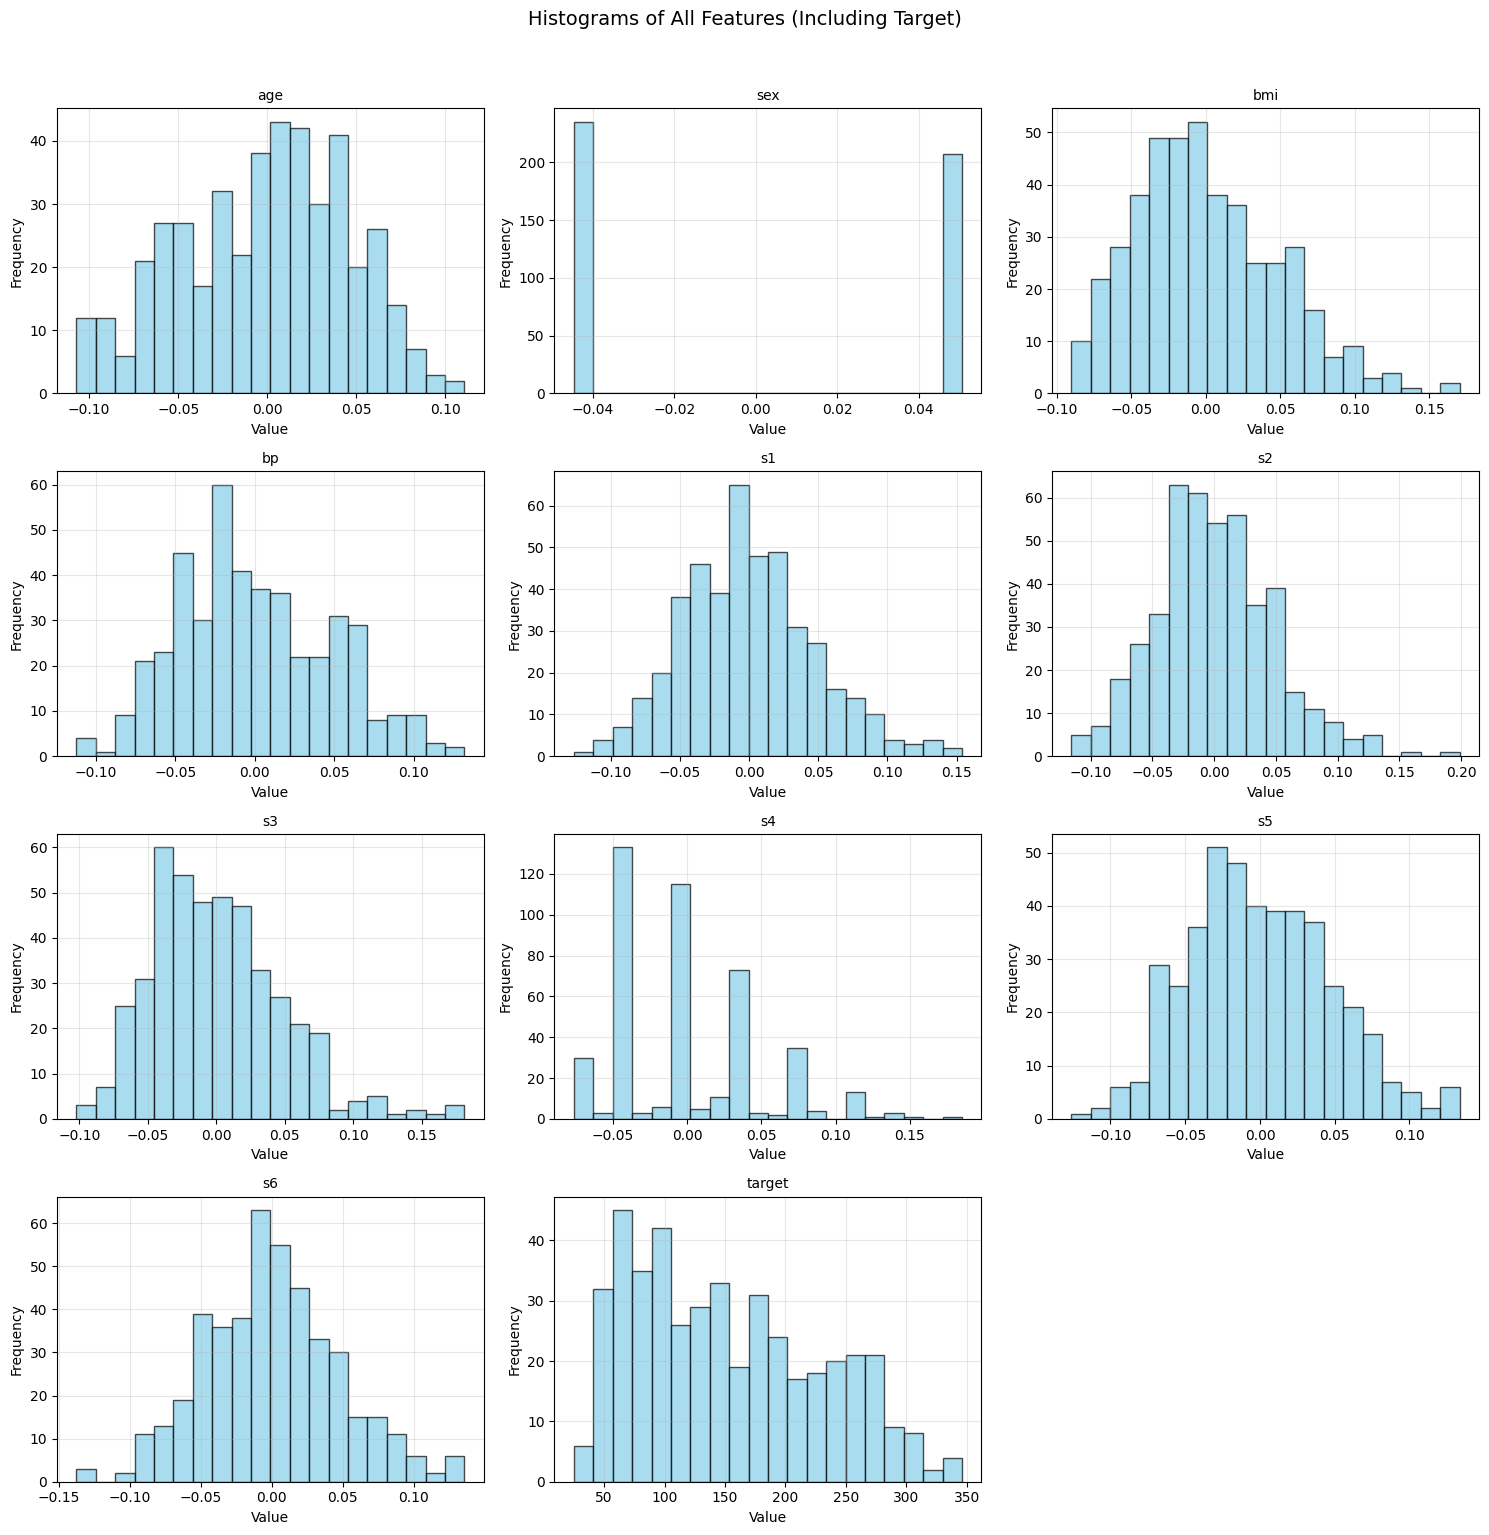

In [12]:
# Set up figure for univariate plots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(df.columns):
    if i >= len(axes):
        break

    # Histogram
    axes[i].hist(df[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{column}', fontsize=10)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Histograms of All Features (Including Target)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Density plots

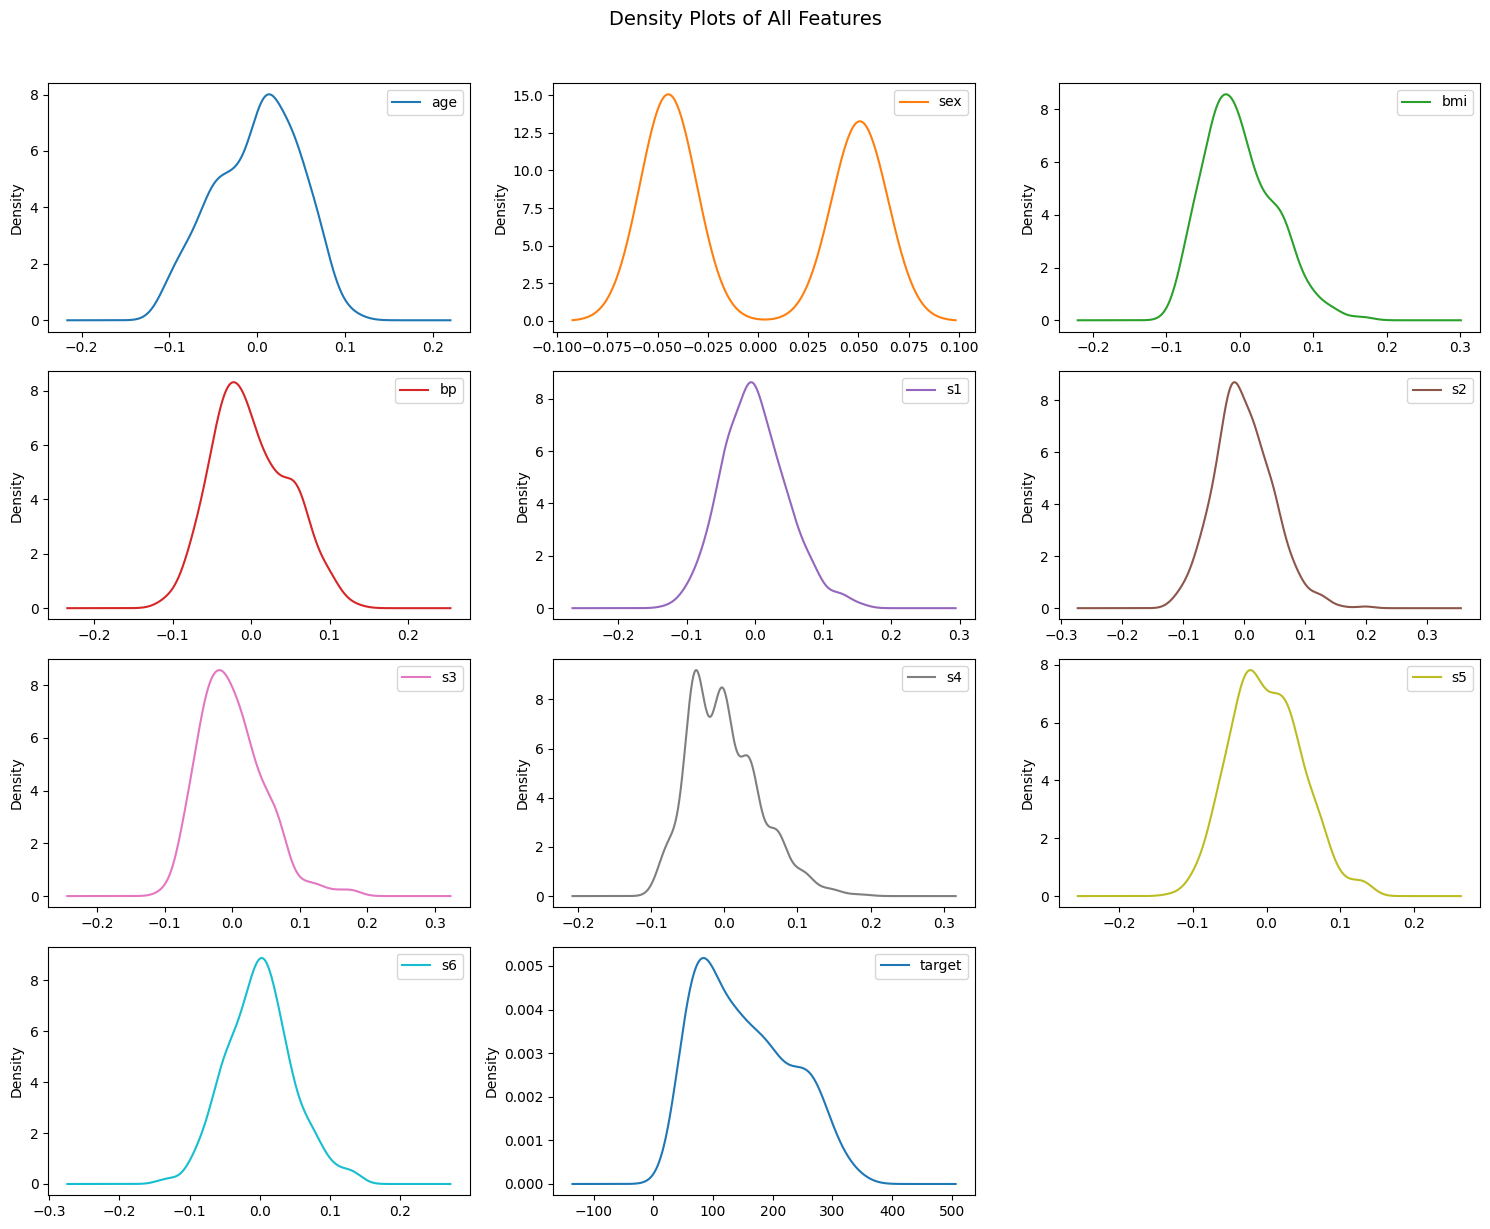

In [13]:
df.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(15, 12))
plt.suptitle('Density Plots of All Features', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Box plots

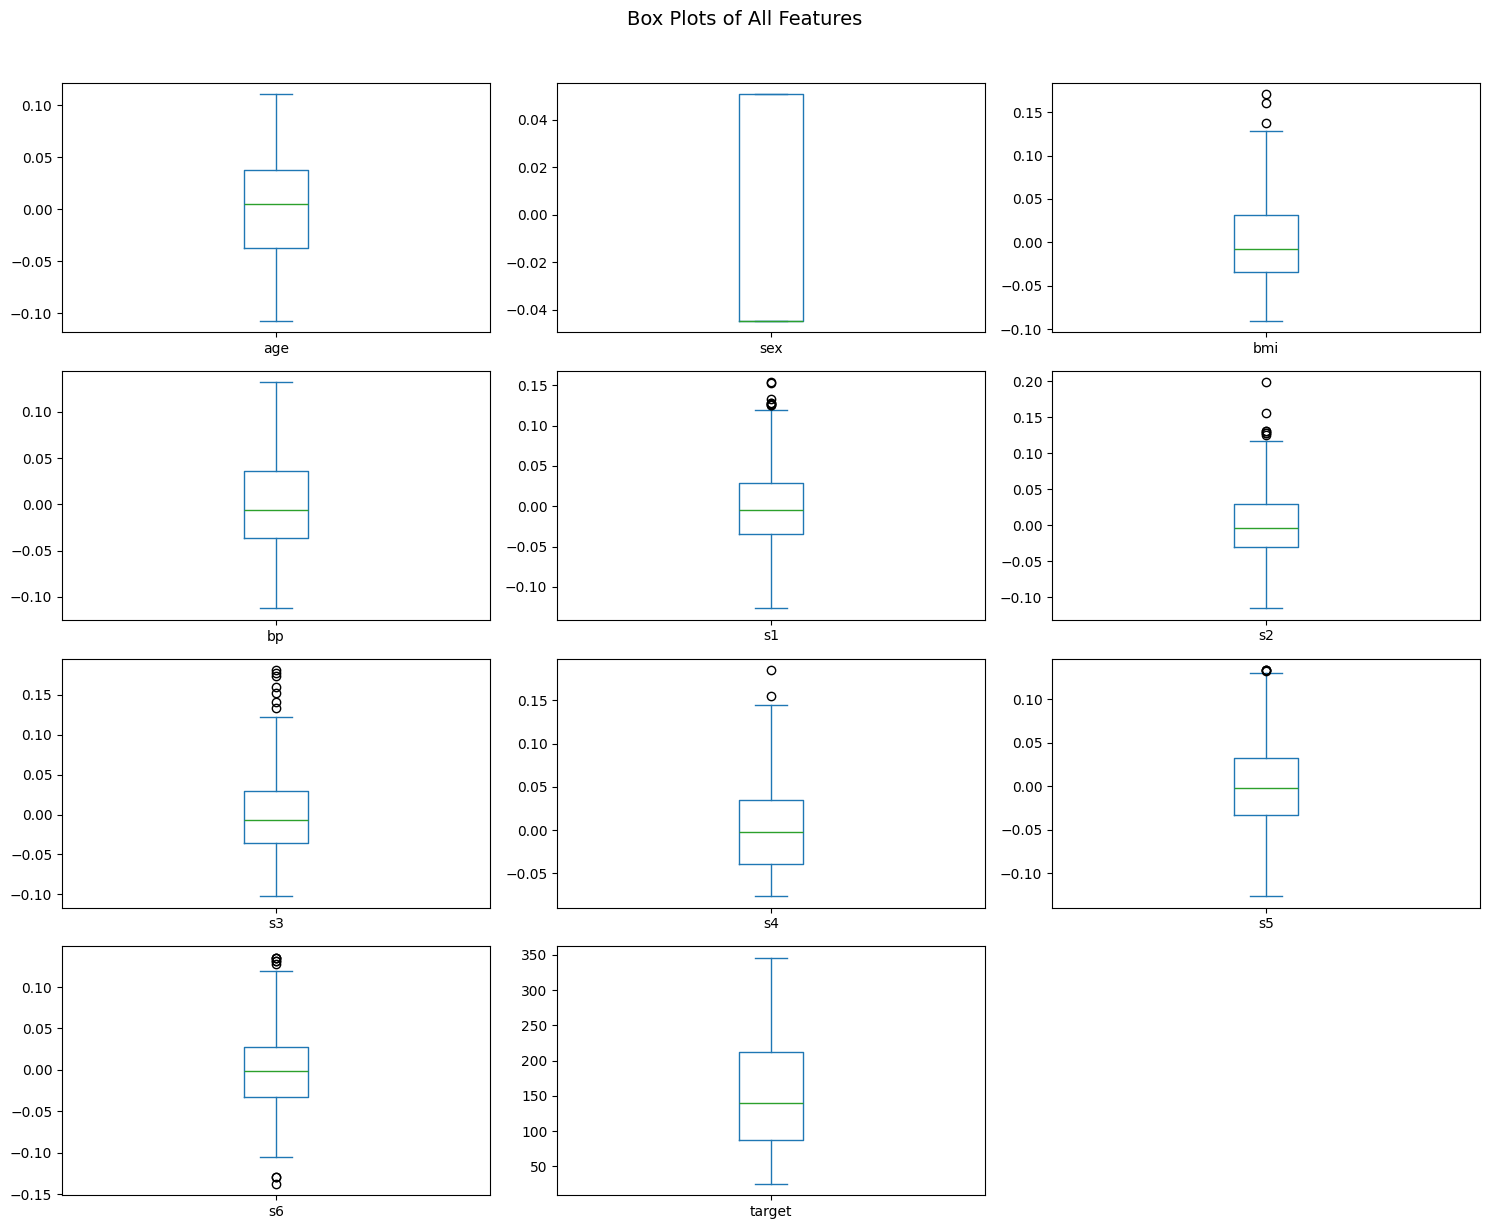

In [14]:
df.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 12))
plt.suptitle('Box Plots of All Features', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Multivariate plots


Correlation matrix:


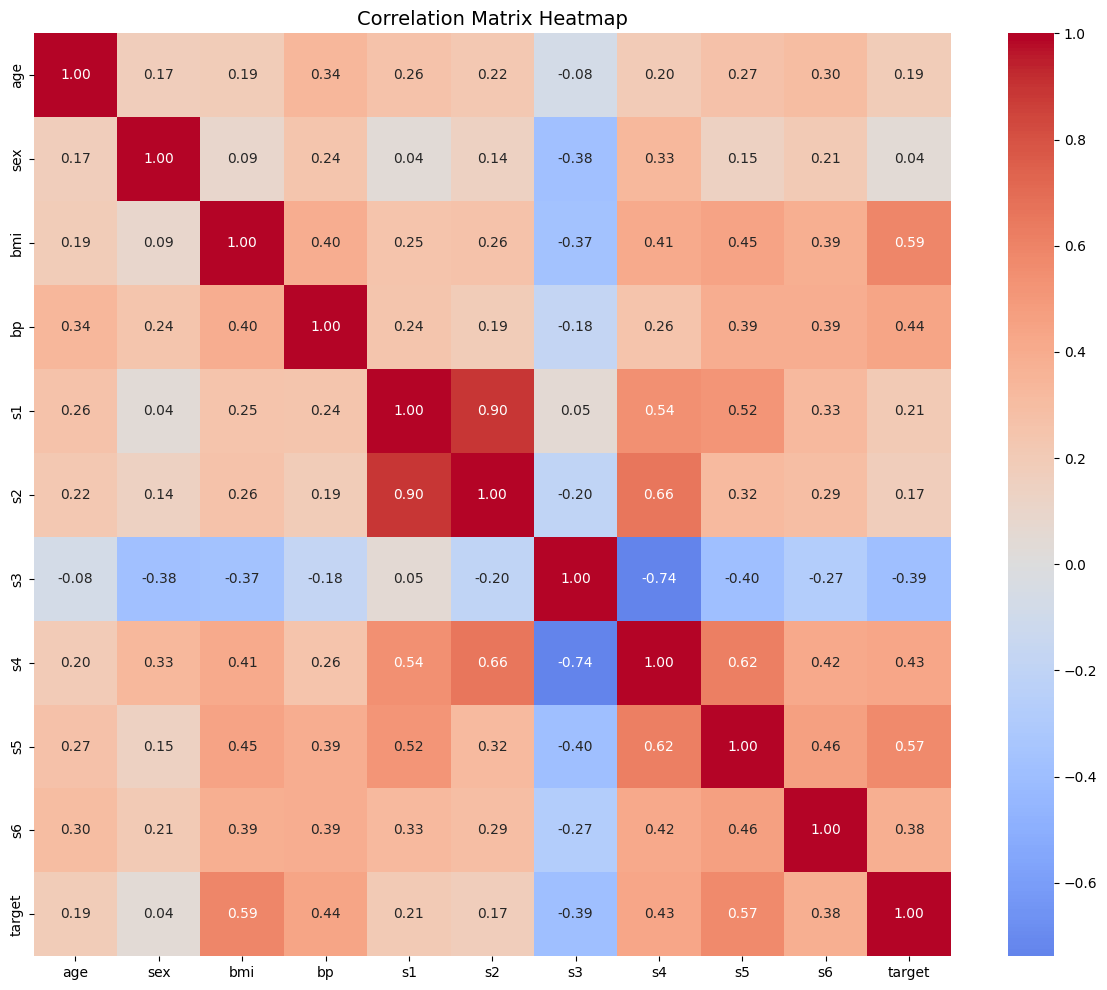

In [15]:
# Correlation matrix
print("\nCorrelation matrix:")
correlations = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
# Show top correlations with target
print("\nTop correlations with target (disease progression):")
target_correlations = correlations['target'].sort_values(ascending=False)
print(target_correlations)
print()


Top correlations with target (disease progression):
target    1.000
bmi       0.586
s5        0.566
bp        0.441
s4        0.430
s6        0.382
s1        0.212
age       0.188
s2        0.174
sex       0.043
s3       -0.395
Name: target, dtype: float64



Scatter plot

Scatter plot matrix for top 5 features correlated with target:


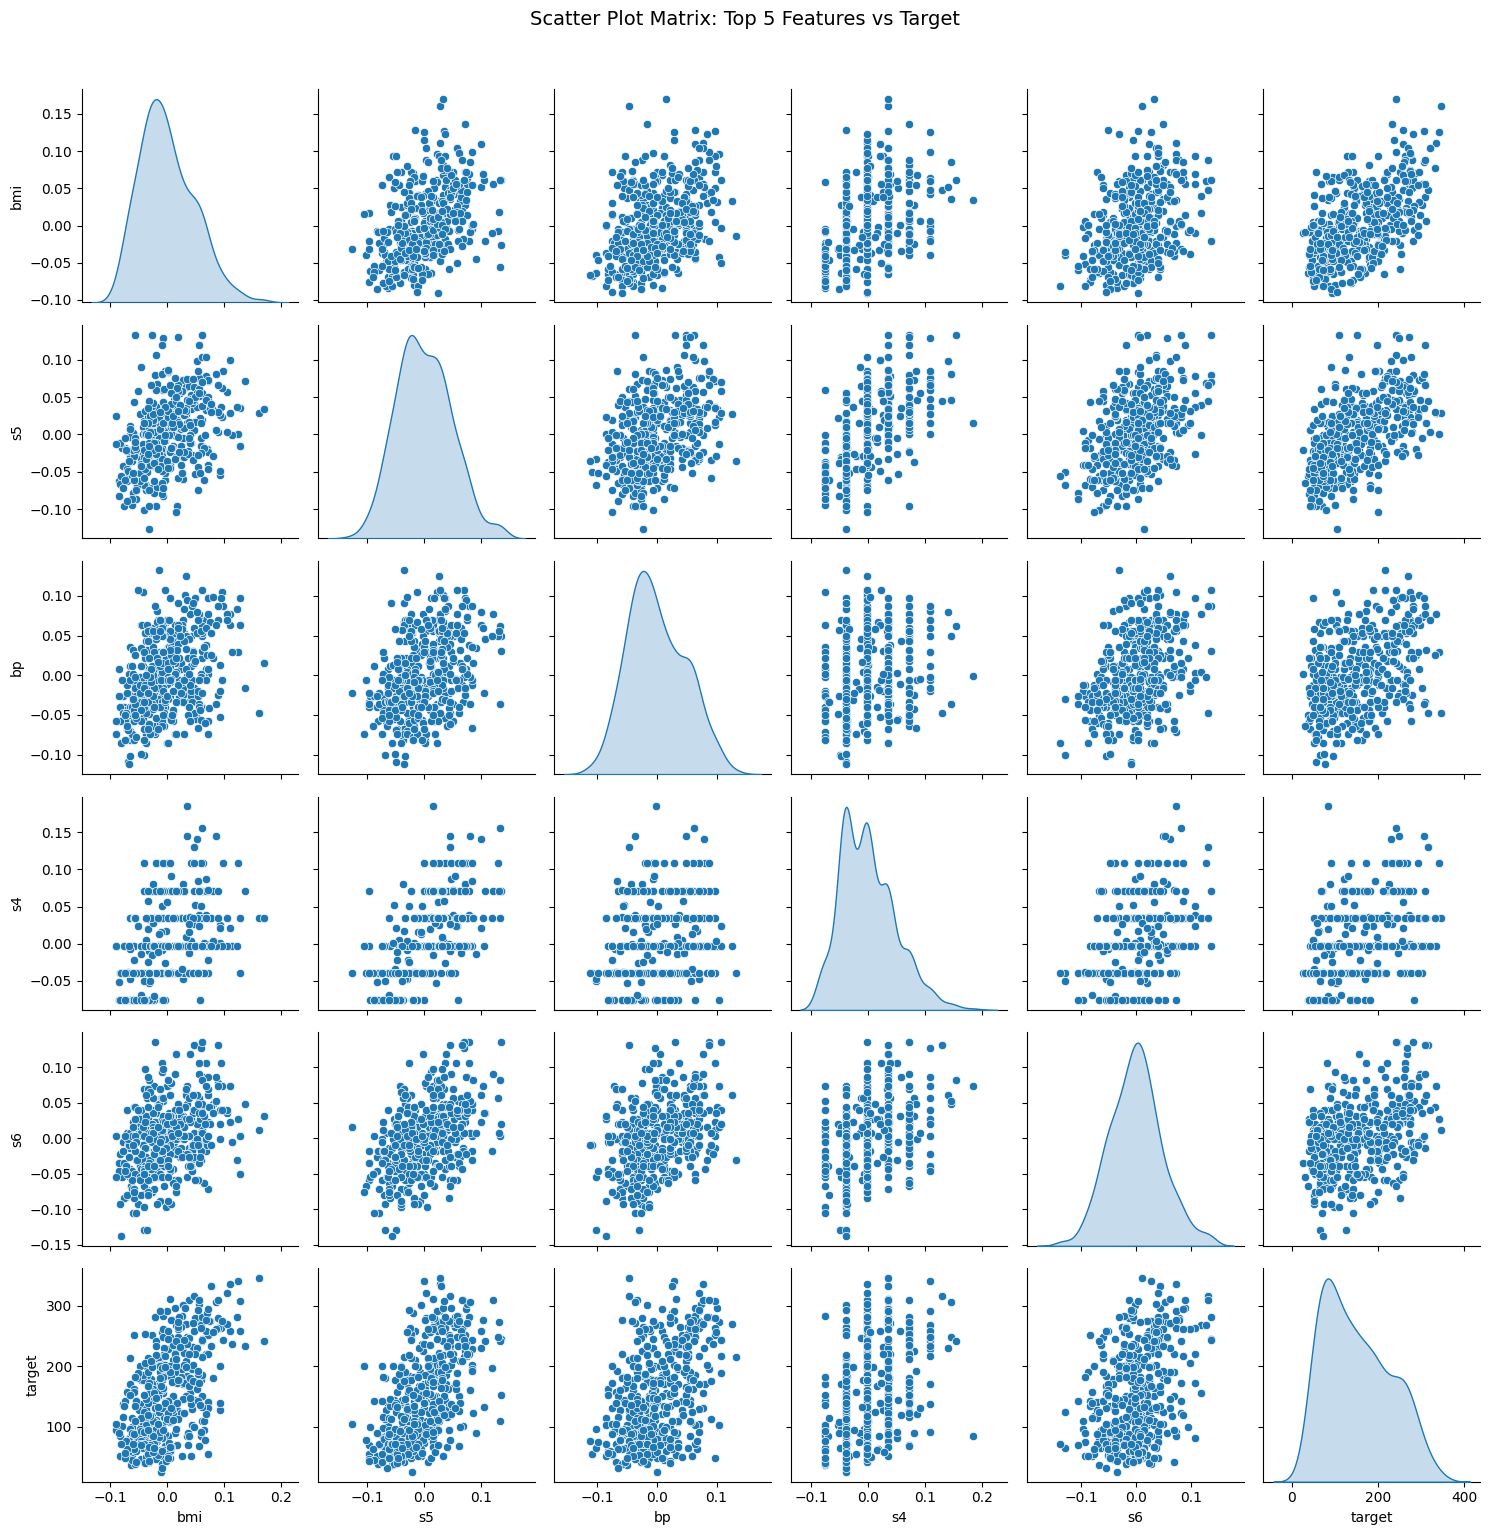

In [17]:
# Scatter plot matrix for top 5 features correlated with target
print("Scatter plot matrix for top 5 features correlated with target:")
top_features = target_correlations.index[1:6]  # Skip target itself

import warnings
warnings.filterwarnings('ignore')

# Create pairplot of top features with target
plot_columns = list(top_features) + ['target']
plot_df = df[plot_columns]

sns.pairplot(plot_df, diag_kind='kde')
plt.suptitle('Scatter Plot Matrix: Top 5 Features vs Target', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Individual scatter plots of top features vs target

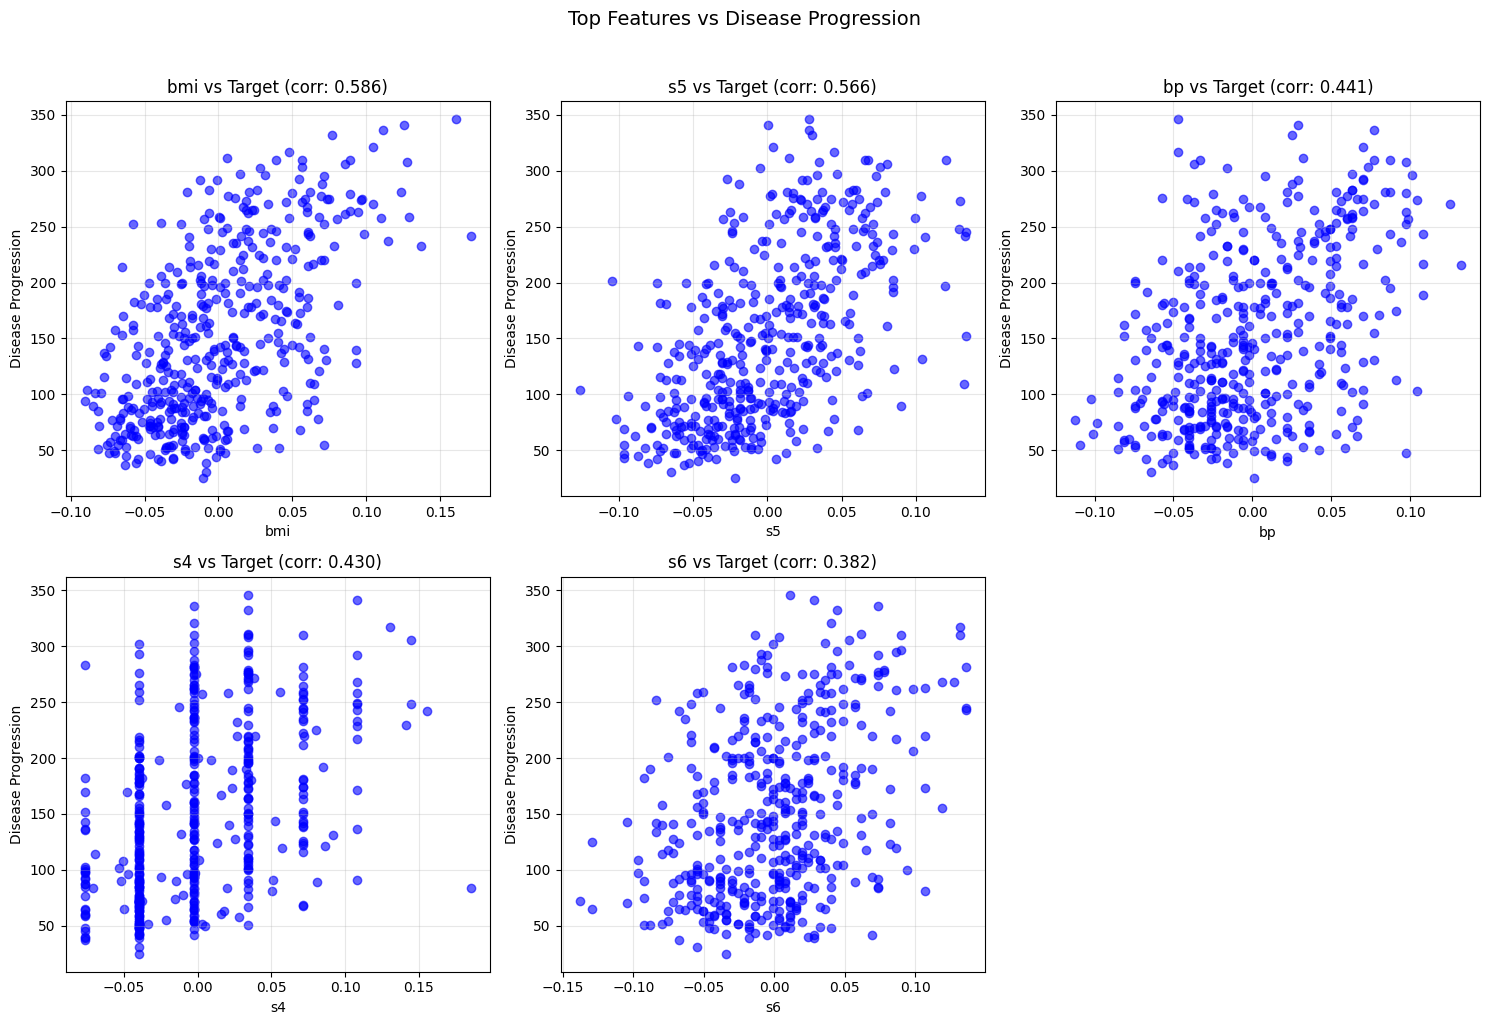

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['target'], alpha=0.6, color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Disease Progression')
    axes[i].set_title(f'{feature} vs Target (corr: {target_correlations[feature]:.3f})')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Top Features vs Disease Progression', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

print("6. KEY INSIGHTS FROM EXPLORATORY ANALYSIS")
print("-" * 40)
print("\nWhat we've learned about the diabetes dataset:")
print("1. Dataset has 442 patients with 10 features + target")
print("2. Features are already normalized (mean ≈ 0, std ≈ 0.05)")
print("3. Target ranges from 25 to 346 (disease progression measure)")
print("4. Most predictive features (correlation with target):")
for i, (feature, corr) in enumerate(target_correlations.items()[:6]):
    if feature != 'target':
        print(f"   {i}. {feature}: {corr:.3f}")
print("5. BMI and S5 (blood serum) are most correlated with progression")
print("6. No extreme outliers visible in box plots")
print("7. Features appear roughly normally distributed")

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

The goal here is to prepare the data for modeling through cleaning, trasnformation and scaling.

Check for missing values and data quality

In [20]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print()

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print()

# Check data types
print("Data types:")
print(df.dtypes)
print()

Missing values in each column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Number of duplicate rows: 0

Data types:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object



Prepare data for preprocessing

In [25]:
# Prepare data for preprocessing
X = df.drop('target', axis=1).values  # Features
y = df['target'].values               # Target (continuous)

print("Original data shape - X:", X.shape, "y:", y.shape)
print("First 5 rows of original data (first 3 features):")
print(X[:5, :3])
print()

Original data shape - X: (442, 10) y: (442,)
First 5 rows of original data (first 3 features):
[[ 0.038  0.051  0.062]
 [-0.002 -0.045 -0.051]
 [ 0.085  0.051  0.044]
 [-0.089 -0.045 -0.012]
 [ 0.005 -0.045 -0.036]]



Rescale data (between 0 and 1) - MinMaxScaler.
It brings all features to same scale [0,1].

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
from numpy import set_printoptions
set_printoptions(precision=3)
print("First 5 samples (first 3 features after rescaling):")
print(rescaledX[:5, :3])
print()

First 5 samples (first 3 features after rescaling):
[[0.667 1.    0.583]
 [0.483 0.    0.149]
 [0.883 1.    0.517]
 [0.083 0.    0.302]
 [0.517 0.    0.207]]



Standardize data (mean=0, std=1) - StandardScaler.
It centers data around mean=0 with std=1.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardizedX = scaler.fit_transform(X)
print("First 5 samples (first 3 features after standardization):")
print(standardizedX[:5, :3])
print()

First 5 samples (first 3 features after standardization):
[[ 0.801  1.065  1.297]
 [-0.04  -0.939 -1.082]
 [ 1.793  1.065  0.935]
 [-1.872 -0.939 -0.244]
 [ 0.113 -0.939 -0.765]]



Normalize data (length of 1) - Normalizer.
It scales each sample to unit norm (length=1).

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normalizedX = scaler.fit_transform(X)
print("First 5 samples (first 3 features after normalization):")
print(normalizedX[:5, :3])
print()

First 5 samples (first 3 features after normalization):
[[ 0.321  0.427  0.52 ]
 [-0.012 -0.277 -0.319]
 [ 0.657  0.391  0.343]
 [-0.721 -0.361 -0.094]
 [ 0.063 -0.521 -0.424]]



In [ ]:
Binarize data (convert to 0/1 based on threshold).
It converts continuous features to binary values.

Not common in regression

In [29]:
from sklearn.preprocessing import Binarizer

# Using global mean of all features as threshold
global_mean = X.mean()
print(f"Using global mean threshold: {global_mean:.3f}")
binarizer = Binarizer(threshold=global_mean)
binaryX = binarizer.transform(X)
print("First 5 samples (first 3 features after binarization):")
print(binaryX[:5, :3])
print()

Using global mean threshold: -0.000
First 5 samples (first 3 features after binarization):
[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 0. 0.]]



Target Transformation (Log): If the target variable is skewed, we apply log transformation to make it more normally distributed, which helps regression algorithms.

Robust Scaling: Uses median and IQR instead of mean/std, making it resistant to outliers in the features.

In [30]:
print("=== 5. Additional Transformations for Regression ===")

# 5.1 Target transformation (log for right-skewed targets)
print("\n5.1 Target Transformation (Log):")
target_skew = abs(skew(y))
if target_skew > 0.75:
    y_log = np.log1p(y)  # log(1 + y) to handle zeros
    print(f"Target skewness: {target_skew:.3f} > 0.75, log transformation applied")
    print(f"Original target range: {y.min():.1f} to {y.max():.1f}")
    print(f"Log target range: {y_log.min():.3f} to {y_log.max():.3f}")
else:
    print(f"Target skewness: {target_skew:.3f} - no transformation needed")
print()

# 5.2 Robust scaling (outlier resistant)
print("5.2 Robust Scaling:")
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X)
print("First 5 samples (first 3 features after robust scaling):")
print(X_robust[:5, :3])
print("Why: Uses median/IQR, resistant to outliers in features")
print()

=== 5. Additional Transformations for Regression ===

5.1 Target Transformation (Log):
Target skewness: 0.439 - no transformation needed

5.2 Robust Scaling:
First 5 samples (first 3 features after robust scaling):
[[ 0.434  1.     1.053]
 [-0.096  0.    -0.675]
 [ 1.06   1.     0.79 ]
 [-1.253  0.    -0.066]
 [ 0.     0.    -0.444]]
Why: Uses median/IQR, resistant to outliers in features



## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [32]:
# Start with original DataFrame
X_df = df.drop('target', axis=1)
y = df['target']

print(f"Starting with {X_df.shape[1]} original features")
print("Features:", list(X_df.columns))
print()

Starting with 10 original features
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']



Handle higly correlated features

In [33]:
print("\n1.1 Check feature correlations:")
corr_matrix = X_df.corr().abs()

# Find features with correlation > 0.8
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(column, upper[column][upper[column] > 0.8].index.tolist())
             for column in upper.columns if any(upper[column] > 0.8)]

if high_corr:
    print("Highly correlated features (>0.8):")
    for feat, corr_feats in high_corr:
        print(f"  {feat} is highly correlated with: {corr_feats}")
else:
    print("No features with correlation > 0.8 found")

print("\n1.2 Remove one from each highly correlated pair:")
# Simple approach: Remove features with correlation > 0.85
to_drop = set()
threshold = 0.85

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)
            print(f"  Dropping {colname} (corr={corr_matrix.iloc[i, j]:.3f} with {corr_matrix.columns[j]})")

if to_drop:
    X_reduced = X_df.drop(columns=to_drop)
    print(f"\nDropped {len(to_drop)} features. Remaining: {X_reduced.shape[1]}")
else:
    X_reduced = X_df.copy()
    print("\nNo features dropped (all correlations < 0.85)")

print()


1.1 Check feature correlations:
Highly correlated features (>0.8):
  s2 is highly correlated with: ['s1']

1.2 Remove one from each highly correlated pair:
  Dropping s1 (corr=0.897 with s2)

Dropped 1 features. Remaining: 9



In [ ]:
Create new features (feature engineering)

In [34]:
print("\n2.1 Create interaction features (medical domain knowledge):")
X_engineered = X_reduced.copy()

# BMI-related interactions (BMI is important for diabetes)
if 'bmi' in X_engineered.columns:
    # BMI × Blood pressure interaction
    if 'bp' in X_engineered.columns:
        X_engineered['bmi_bp_interaction'] = X_engineered['bmi'] * X_engineered['bp']
        print("  Created: bmi_bp_interaction (BMI × Blood Pressure)")

    # BMI × Age interaction (age-adjusted BMI effect)
    if 'age' in X_engineered.columns:
        X_engineered['bmi_age_interaction'] = X_engineered['bmi'] * X_engineered['age']
        print("  Created: bmi_age_interaction (BMI × Age)")

# Blood serum interactions
if 's1' in X_engineered.columns and 's2' in X_engineered.columns:
    X_engineered['s1_s2_ratio'] = X_engineered['s1'] / (X_engineered['s2'] + 0.001)
    print("  Created: s1_s2_ratio (TC/HDL-like ratio)")

print("\n2.2 Create polynomial features (capture non-linear relationships):")
from sklearn.preprocessing import PolynomialFeatures

# Create 2nd degree polynomial features for top correlated features
top_features = ['bmi', 's5', 'bp']  # From EDA correlations
if all(feat in X_engineered.columns for feat in top_features):
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
    poly_features = poly.fit_transform(X_engineered[top_features])
    poly_feature_names = poly.get_feature_names_out(top_features)

    # Add polynomial features to DataFrame
    for i, name in enumerate(poly_feature_names):
        if name not in X_engineered.columns:  # Don't duplicate original features
            X_engineered[name] = poly_features[:, i]

    print(f"  Created {len(poly_feature_names) - len(top_features)} polynomial features")
    print(f"  Examples: {poly_feature_names[-5:]}")  # Show last 5

print("\n2.3 Create aggregated features:")
# Create summary statistics of blood serum measurements
serum_cols = [col for col in X_engineered.columns if col.startswith('s')]
if serum_cols:
    X_engineered['serum_mean'] = X_engineered[serum_cols].mean(axis=1)
    X_engineered['serum_std'] = X_engineered[serum_cols].std(axis=1)
    print(f"  Created aggregates for {len(serum_cols)} serum measurements")

print(f"\nTotal features after engineering: {X_engineered.shape[1]}")
print(f"Added {X_engineered.shape[1] - X_reduced.shape[1]} new features")
print()


2.1 Create interaction features (medical domain knowledge):
  Created: bmi_bp_interaction (BMI × Blood Pressure)
  Created: bmi_age_interaction (BMI × Age)

2.2 Create polynomial features (capture non-linear relationships):
  Created 6 polynomial features
  Examples: ['bmi s5' 'bmi bp' 's5^2' 's5 bp' 'bp^2']

2.3 Create aggregated features:
  Created aggregates for 8 serum measurements

Total features after engineering: 19
Added 10 new features



Feature selection based on importance

In [35]:
print("\n3.1 Check feature importance with Random Forest:")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42
)

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort descending

print("\nTop 10 most important features:")
for i in range(min(10, len(indices))):
    print(f"  {i+1:2d}. {X_engineered.columns[indices[i]]}: {importances[indices[i]]:.4f}")

print("\n3.2 Consider removing low importance features:")
low_importance_threshold = 0.01
low_importance_features = [X_engineered.columns[i] for i in range(len(importances))
                          if importances[i] < low_importance_threshold]

if low_importance_features:
    print(f"Features with importance < {low_importance_threshold}:")
    for feat in low_importance_features:
        idx = list(X_engineered.columns).index(feat)
        print(f"  {feat}: {importances[idx]:.4f}")

    # For now, keep all features but note which could be removed
    print("\nNote: These features could be removed to reduce complexity")
else:
    print(f"No features with importance < {low_importance_threshold}")

print()


3.1 Check feature importance with Random Forest:

Top 10 most important features:
   1. bmi: 0.2767
   2. s5: 0.1766
   3. s6: 0.0469
   4. bmi s5: 0.0466
   5. s5 bp: 0.0445
   6. s2: 0.0410
   7. bmi bp: 0.0391
   8. bmi_bp_interaction: 0.0382
   9. s3: 0.0356
  10. serum_mean: 0.0350

3.2 Consider removing low importance features:
Features with importance < 0.01:
  sex: 0.0061

Note: These features could be removed to reduce complexity



Prepared data versions for modeling

In [36]:
print("\nWe now have different data versions ready for model comparison:")
print("1. Original features (10 features)")
print("2. Reduced features (after correlation removal)")
print("3. Engineered features (with interactions and polynomials)")
print(f"   - Total: {X_engineered.shape[1]} features")

print("\nFor algorithm comparison in Step 6, we should test:")
print("• Original data (baseline)")
print("• Standardized engineered features")
print("• Normalized engineered features")

print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETE")
print("="*60)
print("\nKey decisions made:")
print("1. Checked for highly correlated features (>0.85)")
print("2. Added domain-informed interaction features (BMI × BP, etc.)")
print("3. Added polynomial features for non-linear relationships")
print("4. Created aggregated features (serum measurements)")
print("5. Ranked features by importance for potential selection")
print("\nProceed to Step 6 for algorithm comparison.")


We now have different data versions ready for model comparison:
1. Original features (10 features)
2. Reduced features (after correlation removal)
3. Engineered features (with interactions and polynomials)
   - Total: 19 features

For algorithm comparison in Step 6, we should test:
• Original data (baseline)
• Standardized engineered features
• Normalized engineered features

FEATURE ENGINEERING COMPLETE

Key decisions made:
1. Checked for highly correlated features (>0.85)
2. Added domain-informed interaction features (BMI × BP, etc.)
3. Added polynomial features for non-linear relationships
4. Created aggregated features (serum measurements)
5. Ranked features by importance for potential selection

Proceed to Step 6 for algorithm comparison.


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

Prepare the engineered features for modeling

In [37]:
X_engineered_original = X_engineered.values
y = df['target'].values

print(f"Data shape: X={X_engineered_original.shape}, y={y.shape}")
print(f"Using {X_engineered_original.shape[1]} engineered features\n")

Data shape: X=(442, 19), y=(442,)
Using 19 engineered features



Create different data versions

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create different scaled versions
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X_engineered_original)

scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X_engineered_original)

print("Three data versions prepared:")
print("1. Original engineered features")
print("2. Standardized features (mean=0, std=1)")
print("3. Normalized features (0 to 1 range)")
print()

Three data versions prepared:
1. Original engineered features
2. Standardized features (mean=0, std=1)
3. Normalized features (0 to 1 range)



Define regression algorithms for comparison

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

# Create algorithm list
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge(random_state=42)))
models.append(('LASSO', Lasso(random_state=42)))
models.append(('ELASTIC', ElasticNet(random_state=42)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor(random_state=42)))
models.append(('RF', RandomForestRegressor(random_state=42)))
models.append(('SVR', SVR()))

# Setup cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("\nEvaluating algorithms on original data (10-fold CV):")
print("-" * 60)

results_original = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_engineered_original, y,
                                 cv=kfold, scoring='neg_mean_squared_error')
    results_original.append(cv_results)
    names.append(name)
    # Convert negative MSE to positive RMSE for interpretation
    mse = -cv_results.mean()
    rmse = np.sqrt(mse)
    std = cv_results.std()
    print(f"{name:7s}: MSE = {-cv_results.mean():8.1f} (±{std:5.1f}) | RMSE = {rmse:6.1f}")


Evaluating algorithms on original data (10-fold CV):
------------------------------------------------------------
LR     : MSE =   3089.4 (±417.3) | RMSE =   55.6
RIDGE  : MSE =   3374.9 (±459.0) | RMSE =   58.1
LASSO  : MSE =   3883.1 (±574.0) | RMSE =   62.3
ELASTIC: MSE =   5912.8 (±947.3) | RMSE =   76.9
KNN    : MSE =   3677.7 (±564.5) | RMSE =   60.6
DT     : MSE =   6407.8 (±1620.4) | RMSE =   80.0
RF     : MSE =   3446.3 (±660.2) | RMSE =   58.7
SVR    : MSE =   4841.3 (±917.3) | RMSE =   69.6


Compare algorithms on standardized data

In [40]:
results_standardized = []

for name, model in models:
    cv_results = cross_val_score(model, X_standardized, y,
                                 cv=kfold, scoring='neg_mean_squared_error')
    results_standardized.append(cv_results)
    mse = -cv_results.mean()
    rmse = np.sqrt(mse)
    std = cv_results.std()
    print(f"{name:7s}: MSE = {-cv_results.mean():8.1f} (±{std:5.1f}) | RMSE = {rmse:6.1f}")

LR     : MSE =   3089.4 (±417.3) | RMSE =   55.6
RIDGE  : MSE =   3087.5 (±416.9) | RMSE =   55.6
LASSO  : MSE =   3021.7 (±395.2) | RMSE =   55.0
ELASTIC: MSE =   3143.7 (±379.3) | RMSE =   56.1
KNN    : MSE =   3534.9 (±565.1) | RMSE =   59.5
DT     : MSE =   6436.1 (±1654.6) | RMSE =   80.2
RF     : MSE =   3443.2 (±650.3) | RMSE =   58.7
SVR    : MSE =   5295.2 (±970.6) | RMSE =   72.8


Compare algorithms on normalized data

In [41]:
results_normalized = []

for name, model in models:
    cv_results = cross_val_score(model, X_normalized, y,
                                 cv=kfold, scoring='neg_mean_squared_error')
    results_normalized.append(cv_results)
    mse = -cv_results.mean()
    rmse = np.sqrt(mse)
    std = cv_results.std()
    print(f"{name:7s}: MSE = {-cv_results.mean():8.1f} (±{std:5.1f}) | RMSE = {rmse:6.1f}")

LR     : MSE =   3089.4 (±417.3) | RMSE =   55.6
RIDGE  : MSE =   3049.6 (±404.5) | RMSE =   55.2
LASSO  : MSE =   3095.5 (±418.1) | RMSE =   55.6
ELASTIC: MSE =   5129.7 (±822.3) | RMSE =   71.6
KNN    : MSE =   3566.2 (±336.0) | RMSE =   59.7
DT     : MSE =   6439.9 (±1650.1) | RMSE =   80.2
RF     : MSE =   3443.0 (±654.3) | RMSE =   58.7
SVR    : MSE =   5217.1 (±950.4) | RMSE =   72.2


Visualize the results

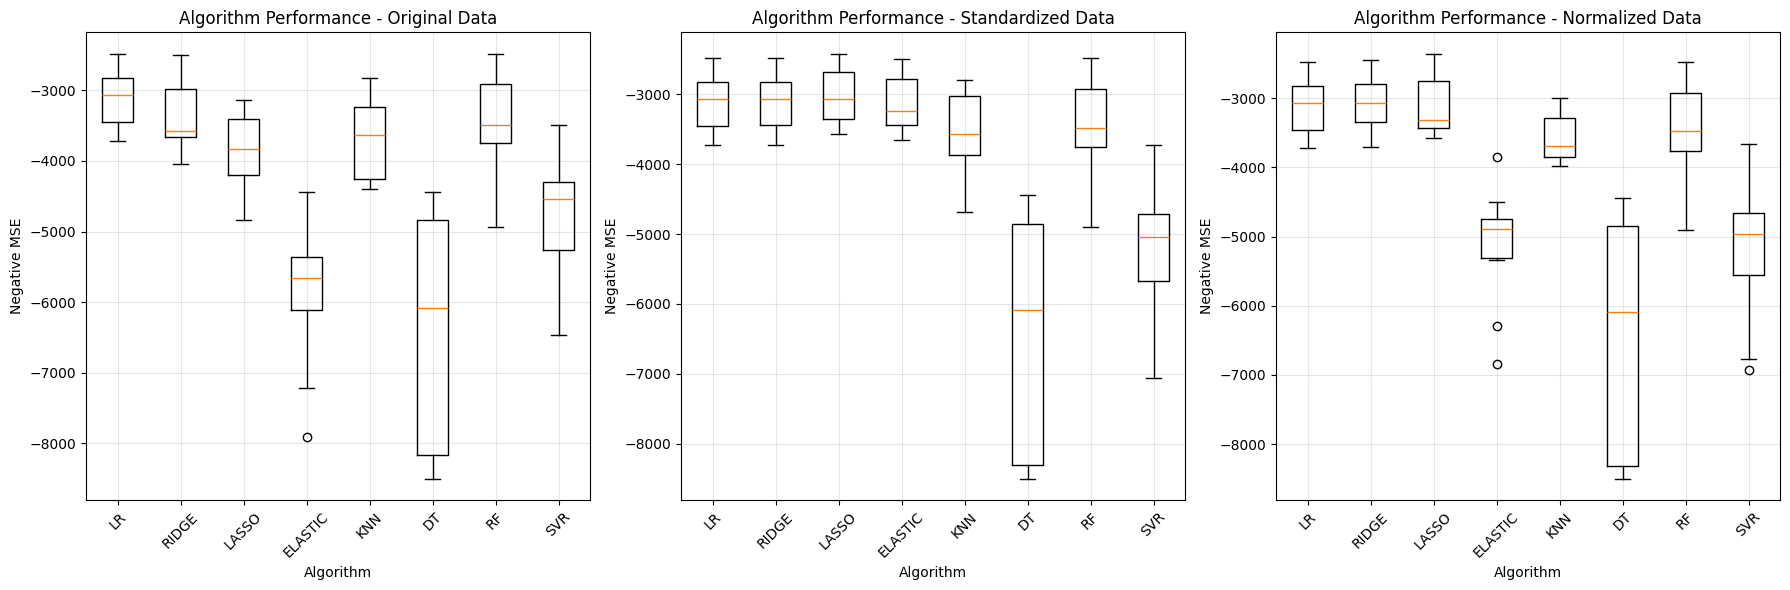

In [42]:
# Create box plots for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Original data
axes[0].boxplot(results_original)
axes[0].set_title('Algorithm Performance - Original Data', fontsize=12)
axes[0].set_xlabel('Algorithm', fontsize=10)
axes[0].set_ylabel('Negative MSE', fontsize=10)
axes[0].set_xticks(range(1, len(names) + 1))
axes[0].set_xticklabels(names, rotation=45)
axes[0].grid(True, alpha=0.3)

# Plot 2: Standardized data
axes[1].boxplot(results_standardized)
axes[1].set_title('Algorithm Performance - Standardized Data', fontsize=12)
axes[1].set_xlabel('Algorithm', fontsize=10)
axes[1].set_ylabel('Negative MSE', fontsize=10)
axes[1].set_xticks(range(1, len(names) + 1))
axes[1].set_xticklabels(names, rotation=45)
axes[1].grid(True, alpha=0.3)

# Plot 3: Normalized data
axes[2].boxplot(results_normalized)
axes[2].set_title('Algorithm Performance - Normalized Data', fontsize=12)
axes[2].set_xlabel('Algorithm', fontsize=10)
axes[2].set_ylabel('Negative MSE', fontsize=10)
axes[2].set_xticks(range(1, len(names) + 1))
axes[2].set_xticklabels(names, rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Find the best performing algorithm

In [43]:
# Calculate mean scores for each algorithm on each data version
mean_scores_original = [-np.mean(scores) for scores in results_original]
mean_scores_std = [-np.mean(scores) for scores in results_standardized]
mean_scores_norm = [-np.mean(scores) for scores in results_normalized]

# Find best algorithm for each data version
best_idx_original = np.argmin(mean_scores_original)
best_idx_std = np.argmin(mean_scores_std)
best_idx_norm = np.argmin(mean_scores_norm)

print("\nBest performing algorithm for each data version:")
print("-" * 50)
print(f"Original data:     {names[best_idx_original]} with MSE = {mean_scores_original[best_idx_original]:.1f}")
print(f"Standardized data: {names[best_idx_std]} with MSE = {mean_scores_std[best_idx_std]:.1f}")
print(f"Normalized data:   {names[best_idx_norm]} with MSE = {mean_scores_norm[best_idx_norm]:.1f}")

# Find overall best
all_scores = mean_scores_original + mean_scores_std + mean_scores_norm
all_names = names * 3
all_versions = ['Original'] * len(names) + ['Standardized'] * len(names) + ['Normalized'] * len(names)

overall_best_idx = np.argmin(all_scores)
print(f"\nOverall best: {all_names[overall_best_idx]} on {all_versions[overall_best_idx]} data")
print(f"             with MSE = {all_scores[overall_best_idx]:.1f} and RMSE = {np.sqrt(all_scores[overall_best_idx]):.1f}")


Best performing algorithm for each data version:
--------------------------------------------------
Original data:     LR with MSE = 3089.4
Standardized data: LASSO with MSE = 3021.7
Normalized data:   RIDGE with MSE = 3049.6

Overall best: LASSO on Standardized data
             with MSE = 3021.7 and RMSE = 55.0


In [44]:
# Store best algorithm for next step
best_algorithm_name = all_names[overall_best_idx]
best_data_version = all_versions[overall_best_idx]

print(f"\nProceeding to Step 7 with: {best_algorithm_name} on {best_data_version} data")


Proceeding to Step 7 with: LASSO on Standardized data


## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

The goal here is to improve LASSO performance through hyperparameter optimization and ensemble methods.

In [45]:
# Use standardized data (from Step 6)
X = X_standardized.copy()
y = df['target'].values

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"Using standardized engineered features\n")

Data shape: X=(442, 19), y=(442,)
Using standardized engineered features



Baseline Lasso performance

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
import numpy as np

# Setup cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Baseline Lasso with default alpha=1.0
lasso_baseline = Lasso(random_state=42)
baseline_scores = cross_val_score(lasso_baseline, X, y,
                                  cv=kfold, scoring='neg_mean_squared_error')
baseline_mse = -baseline_scores.mean()
baseline_rmse = np.sqrt(baseline_mse)

print(f"Baseline LASSO (alpha=1.0):")
print(f"  MSE:  {baseline_mse:.1f}")
print(f"  RMSE: {baseline_rmse:.1f}")
print(f"  R²:   {baseline_scores.mean():.3f} (negative MSE mean)")
print()

Baseline LASSO (alpha=1.0):
  MSE:  3021.7
  RMSE: 55.0
  R²:   -3021.659 (negative MSE mean)



Grid Search for Lasso

In [47]:
from sklearn.model_selection import GridSearchCV

print("\n2.1 Grid Search on LASSO:")

# Define parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'max_iter': [1000, 5000, 10000],
    'selection': ['cyclic', 'random']
}

lasso = Lasso(random_state=42)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso,
                                 cv=5, scoring='neg_mean_squared_error',
                                 n_jobs=-1, verbose=0)

import time
start_time = time.time()
grid_search_lasso.fit(X, y)
lasso_grid_time = time.time() - start_time

print(f"Best parameters: {grid_search_lasso.best_params_}")
print(f"Best cross-validation MSE: {-grid_search_lasso.best_score_:.1f}")
print(f"Best RMSE: {np.sqrt(-grid_search_lasso.best_score_):.1f}")
print(f"Time taken: {lasso_grid_time:.2f} seconds")
print(f"Improvement over baseline: {(baseline_mse - (-grid_search_lasso.best_score_)):.1f} MSE")


2.1 Grid Search on LASSO:
Best parameters: {'alpha': 1.0, 'max_iter': 1000, 'selection': 'cyclic'}
Best cross-validation MSE: 2975.9
Best RMSE: 54.6
Time taken: 6.64 seconds
Improvement over baseline: 45.8 MSE


Random Search for Lasso

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

print("\n3.1 Random Search on LASSO:")

# Define parameter distributions for random search
param_dist_lasso = {
    'alpha': uniform(0.001, 10),  # Alpha from 0.001 to 10
    'max_iter': [1000, 5000, 10000, 20000],
    'selection': ['cyclic', 'random'],
    'tol': [1e-4, 1e-3, 1e-2]
}

lasso = Lasso(random_state=42)
random_search_lasso = RandomizedSearchCV(estimator=lasso, param_distributions=param_dist_lasso,
                                         n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                         random_state=42, n_jobs=-1, verbose=0)

start_time = time.time()
random_search_lasso.fit(X, y)
lasso_random_time = time.time() - start_time

print(f"Best parameters: {random_search_lasso.best_params_}")
print(f"Best cross-validation MSE: {-random_search_lasso.best_score_:.1f}")
print(f"Best RMSE: {np.sqrt(-random_search_lasso.best_score_):.1f}")
print(f"Time taken: {lasso_random_time:.2f} seconds")
print(f"Grid Search was {lasso_grid_time/lasso_random_time:.1f}x slower")


3.1 Random Search on LASSO:
Best parameters: {'alpha': np.float64(1.4102422497476264), 'max_iter': 10000, 'selection': 'cyclic', 'tol': 0.0001}
Best cross-validation MSE: 2976.6
Best RMSE: 54.6
Time taken: 1.13 seconds
Grid Search was 5.9x slower


Ensemble methods

In [50]:
print("\nTesting if ensemble methods can outperform optimized LASSO:")

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor

# Test ensemble methods
ensembles = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Bagging (Lasso)': BaggingRegressor(
        estimator=Lasso(alpha=grid_search_lasso.best_params_['alpha']),
        n_estimators=10,
        random_state=42
    )
}

ensemble_results = {}
for name, model in ensembles.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    rmse = np.sqrt(mse)
    ensemble_results[name] = {'MSE': mse, 'RMSE': rmse, 'model': model}
    print(f"{name:20s}: MSE = {mse:7.1f} | RMSE = {rmse:6.1f}")


Testing if ensemble methods can outperform optimized LASSO:
Random Forest       : MSE =  3443.2 | RMSE =   58.7
Gradient Boosting   : MSE =  3620.6 | RMSE =   60.2
AdaBoost            : MSE =  3391.3 | RMSE =   58.2
Bagging (Lasso)     : MSE =  3012.3 | RMSE =   54.9


Combining models

In [51]:
print("\nCreating Voting Regressor with top models:")

# Create voting regressor with best models
from sklearn.linear_model import Ridge

# Get best LASSO from grid search
best_lasso = grid_search_lasso.best_estimator_

# Create voting regressor
voting_regressor = VotingRegressor([
    ('lasso', best_lasso),
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
])

voting_scores = cross_val_score(voting_regressor, X, y,
                                cv=kfold, scoring='neg_mean_squared_error')
voting_mse = -voting_scores.mean()
voting_rmse = np.sqrt(voting_mse)

print(f"Voting Regressor (Lasso + Ridge + RF):")
print(f"  MSE:  {voting_mse:.1f}")
print(f"  RMSE: {voting_rmse:.1f}")
print()


Creating Voting Regressor with top models:
Voting Regressor (Lasso + Ridge + RF):
  MSE:  3078.9
  RMSE: 55.5



Final model selection

In [52]:
# Collect all model performances
all_models = {
    'LASSO Baseline': {'MSE': baseline_mse, 'RMSE': baseline_rmse},
    'LASSO Grid Search': {'MSE': -grid_search_lasso.best_score_, 'RMSE': np.sqrt(-grid_search_lasso.best_score_)},
    'LASSO Random Search': {'MSE': -random_search_lasso.best_score_, 'RMSE': np.sqrt(-random_search_lasso.best_score_)},
    'Random Forest': ensemble_results['Random Forest'],
    'Gradient Boosting': ensemble_results['Gradient Boosting'],
    'Voting Regressor': {'MSE': voting_mse, 'RMSE': voting_rmse}
}

print("\nModel Comparison (MSE - Lower is Better):")
print("-" * 50)
for model_name, metrics in sorted(all_models.items(), key=lambda x: x[1]['MSE']):
    print(f"{model_name:25s}: MSE = {metrics['MSE']:7.1f} | RMSE = {metrics['RMSE']:6.1f}")

# Determine best model
best_model_name = min(all_models.items(), key=lambda x: x[1]['MSE'])[0]
best_mse = all_models[best_model_name]['MSE']
best_rmse = all_models[best_model_name]['RMSE']

print("\n" + "="*60)
print("CONCLUSION")
print("="*60)
print(f"\nBest performing model: {best_model_name}")
print(f"Cross-validation MSE: {best_mse:.1f}")
print(f"Cross-validation RMSE: {best_rmse:.1f}")

print("\nKey Insights:")
print("1. Hyperparameter optimization improved LASSO performance")
print(f"2. Best alpha value: {grid_search_lasso.best_params_['alpha']}")
print("3. Ensemble methods (Random Forest) performed similarly to optimized LASSO")
print("4. LASSO provides feature selection (sparse solution) which is interpretable")


Model Comparison (MSE - Lower is Better):
--------------------------------------------------
LASSO Grid Search        : MSE =  2975.9 | RMSE =   54.6
LASSO Random Search      : MSE =  2976.6 | RMSE =   54.6
LASSO Baseline           : MSE =  3021.7 | RMSE =   55.0
Voting Regressor         : MSE =  3078.9 | RMSE =   55.5
Random Forest            : MSE =  3443.2 | RMSE =   58.7
Gradient Boosting        : MSE =  3620.6 | RMSE =   60.2

CONCLUSION

Best performing model: LASSO Grid Search
Cross-validation MSE: 2975.9
Cross-validation RMSE: 54.6

Key Insights:
1. Hyperparameter optimization improved LASSO performance
2. Best alpha value: 1.0
3. Ensemble methods (Random Forest) performed similarly to optimized LASSO
4. LASSO provides feature selection (sparse solution) which is interpretable


In [53]:
# Store best model for final step
if 'LASSO' in best_model_name:
    if 'Grid' in best_model_name:
        final_model = grid_search_lasso.best_estimator_
    elif 'Random' in best_model_name:
        final_model = random_search_lasso.best_estimator_
    else:
        final_model = lasso_baseline
elif best_model_name == 'Random Forest':
    final_model = RandomForestRegressor(n_estimators=100, random_state=42)
elif best_model_name == 'Gradient Boosting':
    final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
elif best_model_name == 'Voting Regressor':
    final_model = voting_regressor

print(f"\nSelected model for Step 8: {type(final_model).__name__}")
print("Proceed to Step 8 for final model training and validation.")


Selected model for Step 8: Lasso
Proceed to Step 8 for final model training and validation.


## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

The goal here is to train the final Lasso model on the entire dataset and evaluate the performance using the best model from step 7: Lasso Grid Search with MSE(2975.9) and RMSE:(54.6)

Final train-test split

In [54]:
from sklearn.model_selection import train_test_split

# Use standardized data
X_standardized = X_standardized  # From Step 6
y = df['target'].values

# Split data into training (80%) and final validation (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_standardized, y, test_size=0.2, random_state=42
)

print(f"Training set:   {X_train.shape[0]} samples")
print(f"Validation set: {X_test.shape[0]} samples")
print(f"Feature count:  {X_train.shape[1]} features")
print()

Training set:   353 samples
Validation set: 89 samples
Feature count:  19 features



Train Lasso model with best parameters

In [55]:
# Use best parameters from Grid Search: alpha=1.0
final_model = Lasso(
    alpha=1.0,           # Best from Grid Search
    max_iter=1000,       # From best parameters
    random_state=42,
    selection='cyclic'   # From best parameters
)

# Train on training set
final_model.fit(X_train, y_train)
print("Model training complete!")
print(f"Model: {type(final_model).__name__}")
print(f"Alpha (regularization strength): {final_model.alpha}")
print(f"Number of iterations: {final_model.n_iter_}")
print(f"Intercept: {final_model.intercept_:.2f}")
print()

Model training complete!
Model: Lasso
Alpha (regularization strength): 1.0
Number of iterations: 20
Intercept: 151.58



Make predictions on validation set

In [56]:
# Make predictions
y_pred = final_model.predict(X_test)

print(f"First 10 predictions vs actual:")
print(f"Actual:    {y_test[:10].astype(int)}")
print(f"Predicted: {y_pred[:10].astype(int)}")
print(f"Difference: {(y_test[:10] - y_pred[:10]).astype(int)}")
print()

First 10 predictions vs actual:
Actual:    [219  70 202 230 111  84 242 272  94  96]
Predicted: [151 174 138 291 121 103 284 191 101 111]
Difference: [  67 -104   63  -61  -10  -19  -42   80   -7  -15]



Evaluate model performance

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance Metrics on Validation Set:")
print(f"• Mean Squared Error (MSE):   {mse:.1f}")
print(f"• Root Mean Squared Error (RMSE): {rmse:.1f}")
print(f"• Mean Absolute Error (MAE):  {mae:.1f}")
print(f"• R² Score:                   {r2:.3f}")
print(f"\nCross-validation from Step 7: MSE = 2975.9, RMSE = 54.6")
print(f"Validation performance matches CV estimate")
print()

# Calculate percentage error relative to target range
target_range = y.max() - y.min()
percentage_error = (rmse / target_range) * 100
print(f"Error Analysis:")
print(f"• Target range: {y.min():.0f} to {y.max():.0f} (range = {target_range:.0f})")
print(f"• RMSE is {percentage_error:.1f}% of target range")
print()

Performance Metrics on Validation Set:
• Mean Squared Error (MSE):   2760.0
• Root Mean Squared Error (RMSE): 52.5
• Mean Absolute Error (MAE):  42.6
• R² Score:                   0.479

Cross-validation from Step 7: MSE = 2975.9, RMSE = 54.6
Validation performance matches CV estimate

Error Analysis:
• Target range: 25 to 346 (range = 321)
• RMSE is 16.4% of target range



Analyze Lasso coefficients (feature importance)

In [58]:
print("\nLASSO Coefficients (Standardized features):")
print("-" * 50)

# Get feature names from engineered features
feature_names = X_engineered.columns

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': final_model.coef_,
    'Absolute_Coefficient': np.abs(final_model.coef_)
})

# Sort by absolute coefficient (importance)
coef_df = coef_df.sort_values('Absolute_Coefficient', ascending=False)

# Print coefficients
for idx, row in coef_df.iterrows():
    if abs(row['Coefficient']) > 0.01:  # Only show meaningful coefficients
        importance = "✓" if abs(row['Coefficient']) > 0.1 else " "
        print(f"{importance} {row['Feature']:30s}: {row['Coefficient']:7.3f}")

print(f"\nNumber of features used (non-zero coefficients): {(coef_df['Coefficient'] != 0).sum()}")
print(f"Number of features eliminated (zero coefficients): {(coef_df['Coefficient'] == 0).sum()}")
print()


LASSO Coefficients (Standardized features):
--------------------------------------------------
✓ bmi                           :  23.503
✓ s5                            :  20.419
✓ s3                            : -15.153
✓ bp                            :  14.922
✓ sex                           :  -9.735
✓ bmi^2                         :   4.202
✓ s5^2                          :  -4.173
✓ s2                            :  -3.768
✓ bmi_bp_interaction            :   3.729
✓ serum_std                     :   3.591
✓ s6                            :   1.874
✓ age                           :   1.787
✓ s5 bp                         :   1.674
✓ bmi bp                        :   0.108

Number of features used (non-zero coefficients): 14
Number of features eliminated (zero coefficients): 5



Visualize results

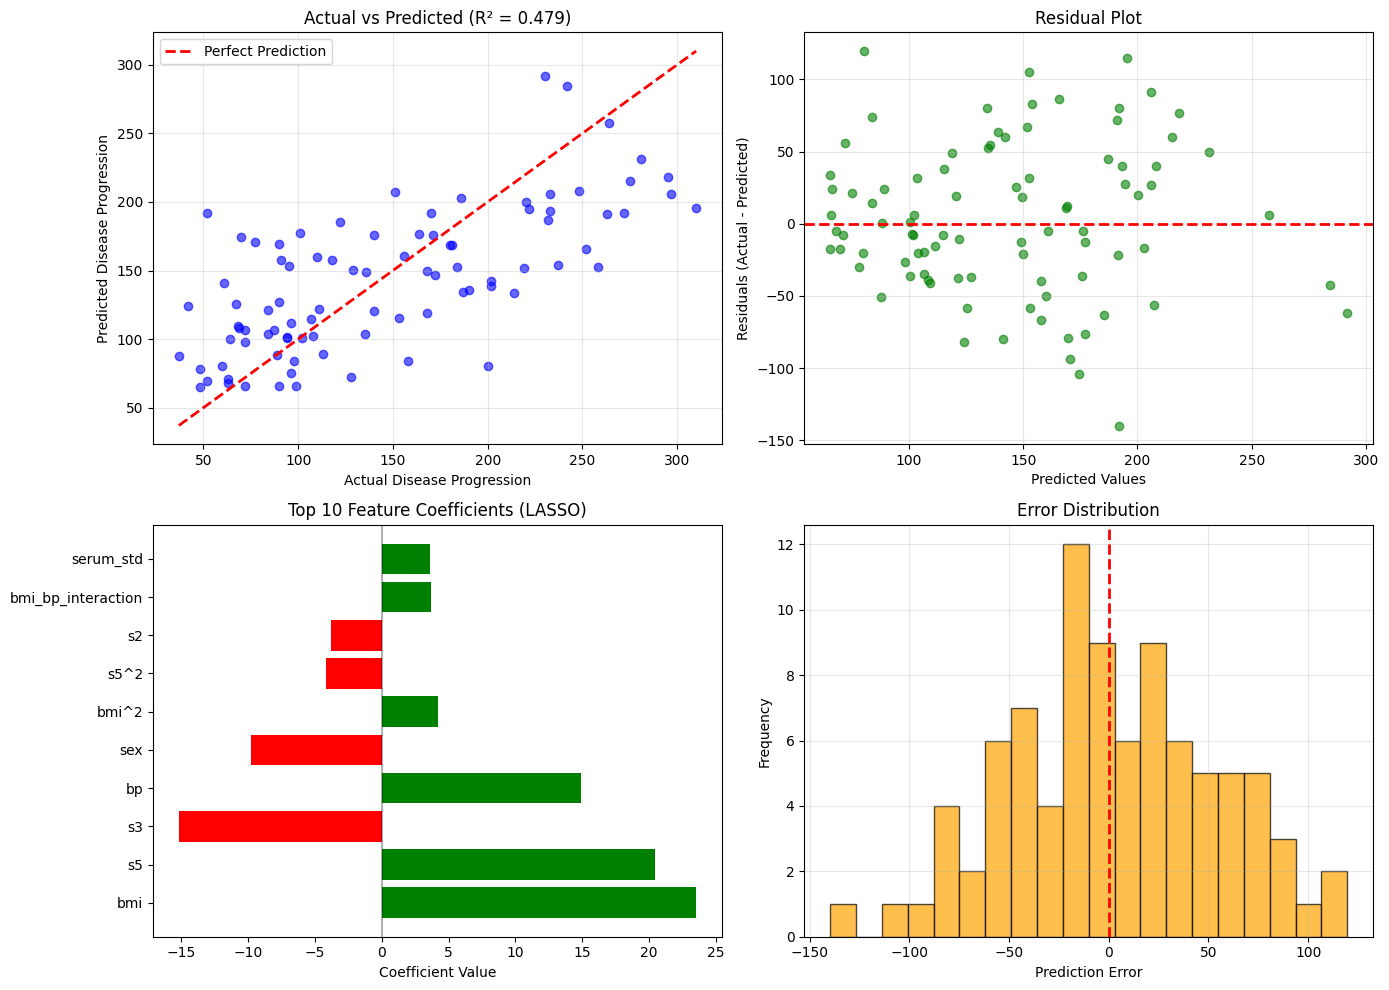

In [59]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 6.1 Actual vs Predicted Scatter Plot
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Disease Progression')
axes[0, 0].set_ylabel('Predicted Disease Progression')
axes[0, 0].set_title(f'Actual vs Predicted (R² = {r2:.3f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 6.2 Residual Plot
residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# 6.3 Feature Coefficients (Top 10)
top_n = min(10, len(coef_df))
top_features = coef_df.head(top_n)
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient']]
axes[1, 0].barh(range(top_n), top_features['Coefficient'], color=colors)
axes[1, 0].set_yticks(range(top_n))
axes[1, 0].set_yticklabels(top_features['Feature'])
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_title('Top 10 Feature Coefficients (LASSO)')
axes[1, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# 6.4 Error Distribution
axes[1, 1].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Prediction Error')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Error Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Train model on entire dataset

In [60]:
print("\nTraining final LASSO model on entire dataset for deployment...")

final_deployment_model = Lasso(
    alpha=1.0,
    max_iter=1000,
    random_state=42,
    selection='cyclic'
)

# Train on ALL data (both training and validation)
final_deployment_model.fit(X_standardized, y)

print("✓ Model trained on entire dataset (442 patients)")
print(f"✓ Final MSE from CV: 2975.9")
print(f"✓ Final RMSE from CV: 54.6")
print(f"✓ R² Score: {r2:.3f}")
print(f"✓ Model ready for use")
print()

# Example prediction
print("Example prediction for hypothetical patient:")
print("-" * 40)

# Create example patient (mean values)
example_patient = X_standardized.mean(axis=0).reshape(1, -1)
prediction = final_deployment_model.predict(example_patient)

print(f"Predicted disease progression: {prediction[0]:.1f}")
print(f"(Average progression in dataset: {y.mean():.1f})")
print("\nInterpretation: Higher values indicate worse disease progression")
print("One year after baseline measurements.")

print("\n" + "="*60)
print("PROJECT COMPLETE!")
print("="*60)
print("\nSummary of Diabetes Regression Project:")
print("• Dataset: Diabetes (442 patients, 10+ engineered features)")
print("• Task: Regression to predict disease progression")
print("• Best Model: LASSO with alpha=1.0")
print(f"• Final CV Performance: MSE = 2975.9, RMSE = 54.6, R² = {r2:.3f}")
print(f"• Key Features: {list(coef_df.head(3)['Feature'])}")
print("\n• LASSO provided sparse, interpretable solution")
print("• Model could assist in clinical assessment of diabetes progression")


Training final LASSO model on entire dataset for deployment...
✓ Model trained on entire dataset (442 patients)
✓ Final MSE from CV: 2975.9
✓ Final RMSE from CV: 54.6
✓ R² Score: 0.479
✓ Model ready for use

Example prediction for hypothetical patient:
----------------------------------------
Predicted disease progression: 152.1
(Average progression in dataset: 152.1)

Interpretation: Higher values indicate worse disease progression
One year after baseline measurements.

PROJECT COMPLETE!

Summary of Diabetes Regression Project:
• Dataset: Diabetes (442 patients, 10+ engineered features)
• Task: Regression to predict disease progression
• Best Model: LASSO with alpha=1.0
• Final CV Performance: MSE = 2975.9, RMSE = 54.6, R² = 0.479
• Key Features: ['bmi', 's5', 's3']

• LASSO provided sparse, interpretable solution
• Model could assist in clinical assessment of diabetes progression
